# Make the logo

This is the notebook used to generate the seQuencing logo.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sequencing import Transmon, System, get_sequence, delay

In [2]:
qubit = Transmon('qubit')
qubit.gaussian_pulse.sigma = 30
system = System('system', modes=[qubit])

## sequcing repo logo

In [3]:
seq = get_sequence(system)

qubit.rotate_x(np.pi, detune=3e-2)
delay(80)
delay(60)
delay(80)
qubit.rotate_y(np.pi, detune=-3e-2)

Text(229.5, -0.02, 'Simulate realistic\nquantum control sequences\nusing QuTiP')

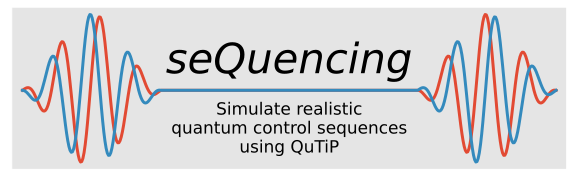

In [4]:
times = seq.times

center = (times.max() - times.min())/2

fig, ax = seq.plot_coefficients(subplots=False)
ax.grid(False)
fontdict = dict(
    fontsize=42,
    family='sans-serif',
)
ax.text(center, 5.5e-3, '$seQuencing$', fontdict=fontdict, ha='center', color='k')
for line in ax.lines:
    line.set_linewidth(3)
    # line.set_color('white')
ax.get_legend().remove()

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.set_size_inches(10,3)
ax.set_xlim(times.min() - center/25, times.max() + center/25)

ax.text(
    center, -20e-3, 'Simulate realistic\nquantum control sequences\nusing QuTiP',
    ha='center', fontsize=17, color='k',
)

In [5]:
for fmt in ['svg', 'png', 'pdf']:
    fig.savefig(
        f'sequencing-logo.{fmt}', transparent=True,
        bbox_inches='tight', pad_inches=-0.065, dpi=200
    )

## sequencing-dev logo

GitHub recommends 500 px by 500 px, see [here](https://docs.github.com/en/github/setting-up-and-managing-your-github-profile/personalizing-your-profile#changing-your-profile-picture).

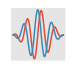

In [6]:
seq = get_sequence(system)

qubit.rotate_x(np.pi, detune=3e-2)

fig, ax = seq.plot_coefficients(subplots=False)
ax.grid(False)
for line in ax.lines:
    line.set_linewidth(1.5)
ax.get_legend().remove()

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.set_size_inches(1,1)

In [7]:
for fmt in ['svg', 'png', 'pdf']:
    fig.savefig(
        f'sequencing-dev-logo.{fmt}', transparent=True,
        bbox_inches='tight', pad_inches=0, dpi=500
    )